In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("spearman_corr.csv")
df_month

,August_4,March_5,August_8,November_5,April_6,May,November_8,May_9,March,August_9,...,March_4,May_2,February,August_2,February_3,January,May_7,September,December_5,July
0,-0.738326,0.386832,-0.081476,0.582192,-0.557806,0.354584,0.247386,-0.104037,-0.521475,-0.316877,...,-0.459479,0.065958,-0.642295,-0.038540,-0.410036,0.283877,-0.027729,0.673726,-0.543245,0.543782
1,-0.738326,0.185237,-0.081476,0.582192,-0.351881,0.439268,0.247386,-0.406355,-0.733768,-0.316877,...,-0.248199,-0.204301,-0.467425,-0.038540,-0.418927,-0.093998,-0.531793,0.673726,-0.543245,0.543782
2,-0.695796,-0.522044,0.042423,0.500314,-0.545842,0.704365,0.360082,0.238860,-0.557627,-0.607159,...,-0.014996,-0.557531,-0.439395,0.430505,0.157363,0.308643,-0.201086,0.205671,-0.490464,0.622493
3,-0.947883,0.037356,-0.030157,0.805822,0.012633,0.456551,0.301041,-0.367998,-0.481349,-0.203165,...,-0.572016,-0.207411,-0.655816,0.512011,-0.764998,0.075972,-0.253224,0.279647,-0.271268,0.676271
4,-0.607567,0.753036,0.199598,0.590018,-0.691691,0.420335,0.298148,0.168711,-0.422418,-0.350529,...,-0.619590,-0.379287,-0.358546,0.067740,0.223191,-0.110262,-0.503339,-0.164191,-0.951042,0.622059
5,-0.553747,-0.149220,-0.259849,0.871422,-0.424972,0.467133,0.114645,-0.739093,-0.787256,-0.271589,...,0.417452,-0.416470,-0.826069,-0.140650,0.149704,0.112025,-0.424800,-0.052347,-0.734441,0.193646
6,-0.856548,0.002876,-0.123362,0.071080,-0.101287,0.606806,0.685788,-0.323658,-0.595140,-0.313559,...,0.116179,-0.005767,-0.291002,0.431329,-0.268274,-0.065487,-0.428695,0.579060,-0.833936,0.311775
7,-0.195088,0.445065,-0.442182,0.611319,-0.342192,0.451416,0.326984,0.005169,-0.243064,-0.030990,...,-0.784619,-0.519033,-0.357850,0.540208,-0.228695,-0.174722,-0.684192,-0.500729,-0.392601,0.860645
8,-0.644855,-0.053046,0.037516,1.154874,-0.202636,0.456371,0.517858,-0.363822,-0.556410,-0.586443,...,-0.620324,-0.274267,-0.580875,-0.041460,-0.503970,-0.327275,0.048677,0.039847,-0.211715,0.541718
9,-0.980771,0.283769,-0.004844,0.513852,-0.229558,0.410204,0.230598,-0.595254,-0.536789,-0.264629,...,-0.519800,-0.142835,-0.587945,0.292230,-0.749800,-0.015916,-0.223745,-0.179664,-0.260358,0.368378


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :20]
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.07821677e-01,  8.93872688e-01,  4.53186055e-01,
         6.13117473e-02, -1.10851692e+00, -4.22898529e-01,
        -8.91838192e-01, -9.41709261e-02,  2.35226007e-01,
         1.63174077e-01,  3.61446367e-01, -2.63288165e-02,
        -8.21632322e-01, -9.97881301e-02,  8.74779221e-01,
         2.56002309e-01,  1.10763297e-01, -6.67603842e-01,
         2.60671380e+00,  7.67133127e-01],
       [-1.07821677e-01,  3.02345626e-01,  4.53186055e-01,
         6.13117473e-02, -2.62405613e-02, -1.12555970e-02,
        -8.91838192e-01, -1.09685833e+00, -1.16647193e+00,
         1.63174077e-01,  3.61446367e-01,  1.35062858e+00,
        -8.21632322e-01, -5.29565604e-01,  8.74779221e-01,
         9.87929450e-01,  1.10763297e-01, -6.67603842e-01,
        -5.00665078e-01,  7.67133127e-01],
       [ 6.49284578e-02, -1.77298402e+00,  1.05549471e+00,
        -2.23023532e-01, -1.04563524e+00,  1.27736491e+00,
        -2.98123595e-01,  1.04309785e+00, -3.47713915e-03,
        -8.45476277e-01,  1.0

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] #df.iloc[43:]['avg']
    y_test.append(y_ts)

In [8]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [9]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

In [10]:
x_test = df_month.iloc[43:, :20]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 1.21107640e+00,  1.49492542e-01,  3.54267868e-01,
        -1.93055675e+00,  5.31255698e-01,  5.94804657e-01,
         7.45654678e-01,  1.62626640e+00, -4.53325453e-01,
        -4.13260491e-01, -1.55683659e+00,  4.70768494e-02,
        -4.96754217e-01,  2.02184992e-01,  2.59343190e-01,
        -4.30910006e-01, -6.04043847e-01, -1.67656207e+00,
        -3.71868818e-01,  1.04520796e+00],
       [ 1.41827358e+00, -8.45480826e-01, -1.08843785e+00,
         5.46205867e-01, -1.90666683e+00, -8.99930996e-01,
         8.89970847e-03, -2.20117312e-03, -5.68652090e-01,
         2.40985394e-01,  3.69536934e-01,  7.84417144e-01,
         5.75030989e-01, -8.79414850e-01,  1.01241842e+00,
         3.13750428e-02,  6.82674402e-01,  2.12687569e-01,
         3.44652818e-01, -6.47655194e-01],
       [ 1.06884947e+00,  2.06987554e-01, -3.15726053e+00,
        -1.12533353e+00, -2.78507379e-01,  3.46939054e-01,
         1.68383096e+00,  1.05018842e+00,  7.27970063e-01,
        -1.12970410e+00, -1.7

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 40}
Best Score: 0.5133650800715622
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 31}
Best Score: 0.2424204014193223
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 29}
Best Score: 0.4863260232112944
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 10}
Best Score: 0.49583951417298233
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 47}
Best Score: 0.4616903835900628


In [13]:
y_pred_list

[array([ 0.47986204,  0.45796181,  0.53882656, -0.12380089,  0.49514711,
         0.0146383 , -0.47232542, -0.37879395,  0.73008268, -0.47509645,
        -0.44687819, -0.02759814, -0.12490899, -0.12637893,  0.0788952 ,
        -0.35403196]),
 array([ 0.16336152,  0.30034187,  0.1603615 , -0.14258936,  0.31668342,
         0.12880005, -0.5632434 , -0.20884711,  0.56547896, -0.35520196,
        -0.32471489, -0.02649527, -0.07996374, -0.07262935, -0.03041993,
        -0.29159575]),
 array([ 0.25091402,  0.36063437,  0.31398705,  0.10978266,  0.34362609,
         0.05039354, -0.48368536, -0.23971782,  0.45904555, -0.70957305,
        -0.33258135,  0.15208172, -0.18076675,  0.00893028, -0.08546138,
        -0.51509315]),
 array([ 0.60158333,  0.48890163,  1.00275877, -0.10849375,  0.90636905,
         0.07098242, -0.51008288, -0.19103025,  0.70077679, -0.75757937,
        -0.09739683, -0.24030075, -0.16876659,  0.17748974, -0.01204056,
        -0.39917811]),
 array([ 0.62607349,  0.44752733

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.5049033563071111,
 0.4595850050996925,
 0.5804275980654462,
 0.35542133681632493,
 0.5413113585159728]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+vwind/20 predictors/spearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+vwind/20 predictors/spearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+vwind/20 predictors/spearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'AT+vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+vwind/20 predictors/spearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:
y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 40}
Best Score: 0.5133650800715622
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 31}
Best Score: 0.2424204014193223
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 29}
Best Score: 0.4863260232112944
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 10}
Best Score: 0.49583951417298233
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 47}
Best Score: 0.4616903835900628


In [21]:
y_pred_list_rf

[array([ 0.47986204,  0.45796181,  0.53882656, -0.12380089,  0.49514711,
         0.0146383 , -0.47232542, -0.37879395,  0.73008268, -0.47509645,
        -0.44687819, -0.02759814, -0.12490899, -0.12637893,  0.0788952 ,
        -0.35403196]),
 array([ 0.16336152,  0.30034187,  0.1603615 , -0.14258936,  0.31668342,
         0.12880005, -0.5632434 , -0.20884711,  0.56547896, -0.35520196,
        -0.32471489, -0.02649527, -0.07996374, -0.07262935, -0.03041993,
        -0.29159575]),
 array([ 0.25091402,  0.36063437,  0.31398705,  0.10978266,  0.34362609,
         0.05039354, -0.48368536, -0.23971782,  0.45904555, -0.70957305,
        -0.33258135,  0.15208172, -0.18076675,  0.00893028, -0.08546138,
        -0.51509315]),
 array([ 0.60158333,  0.48890163,  1.00275877, -0.10849375,  0.90636905,
         0.07098242, -0.51008288, -0.19103025,  0.70077679, -0.75757937,
        -0.09739683, -0.24030075, -0.16876659,  0.17748974, -0.01204056,
        -0.39917811]),
 array([ 0.62607349,  0.44752733

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.5049033563071111,
 0.4595850050996925,
 0.5804275980654462,
 0.35542133681632493,
 0.5413113585159728]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+vwind/20 predictors/spearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+vwind/20 predictors/spearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+vwind/20 predictors/spearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'AT+vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+vwind/20 predictors/spearson/comparison plots/randomforest


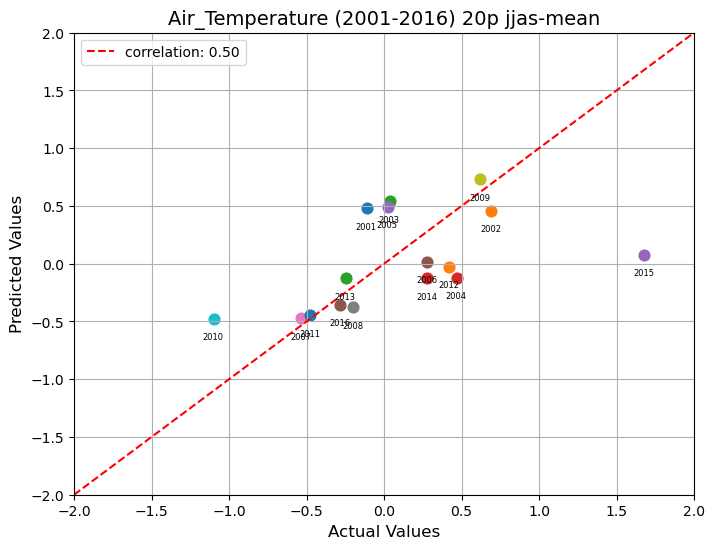

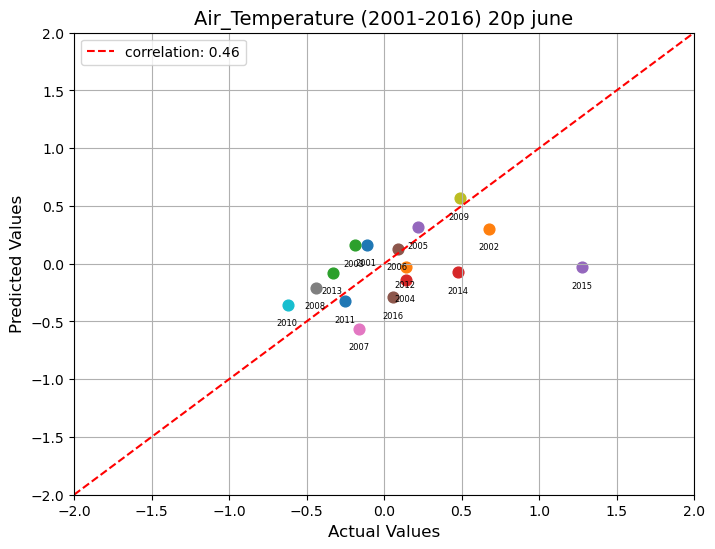

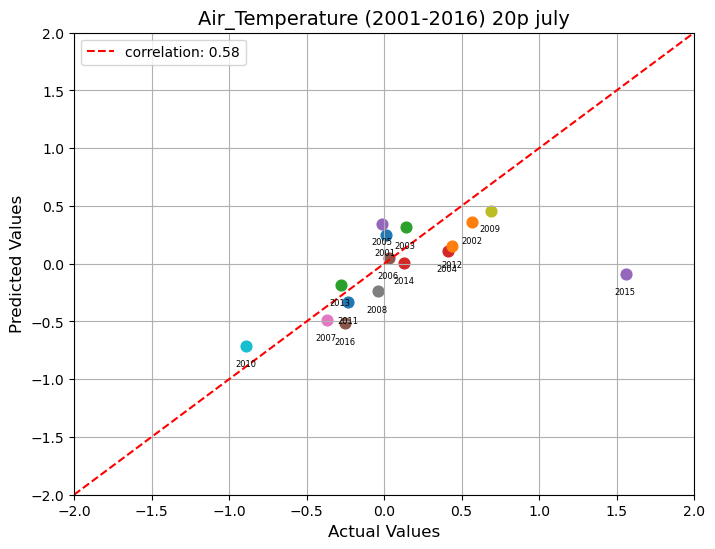

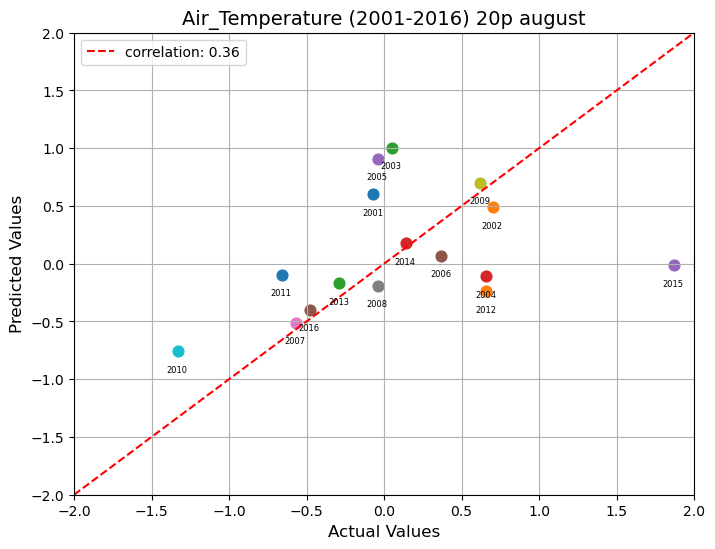

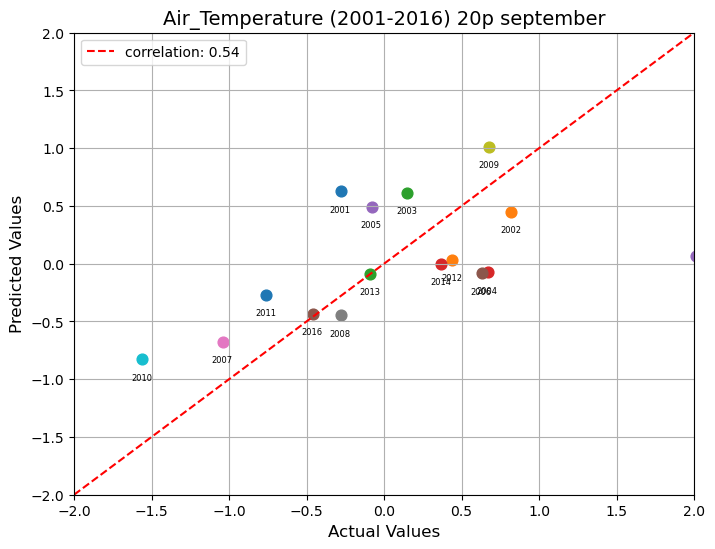

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()